In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Load and preprocess the MNIST dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define a function to plot samples with labels
def plot_samples(images, labels, class_names, num_samples=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Label: {class_names[labels[i]]}")
        plt.axis('off')

# Define class names for MNIST (digits 0-9)
class_names = [str(i) for i in range(10)]

# Plot a few training samples
plot_samples(train_images, train_labels, class_names, num_samples=5)
plt.suptitle('Training Samples')
plt.show()

# Plot a few testing samples
plot_samples(test_images, test_labels, class_names, num_samples=5)
plt.suptitle('Testing Samples')
plt.show()


ValueError: JAX requires ml_dtypes version 0.4.0 or newer; installed version is 0.3.1.

In [ ]:
# Import libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Custom initializer for constant value

# Define the Sequential model
model = keras.Sequential([
    # Flatten the 28x28 input images to a 1D array (784 elements)
    layers.Flatten(input_shape=(28, 28)),

    # Add a dense (fully connected) layer with 128 units and ReLU activation
    layers.Dense(128, activation='relu'),
     # Add a dense (fully connected) layer with 64 units and ReLU activation
    layers.Dense(64, activation='relu'),

    # Add another dense layer with 10 units (one for each digit) and softmax activation
    layers.Dense(10, activation='softmax')
])

learning_rate=0.0005

optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
#optimizer = keras.optimizers.SGD(learning_rate=learning_rate,momentum=0.5)
#optimizer = keras.optimizers.SGD(learning_rate=learning_rate,momentum=0.0)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()



Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_37 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_103 (Dense)                    │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_104 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_105 (Dense)                    │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model and collect training history

history = model.fit(train_images, train_labels, epochs=15, validation_split=0.5, batch_size=1024,verbose=2)



Epoch 1/15
30/30 - 2s - 52ms/step - accuracy: 0.9700 - loss: 0.1079 - val_accuracy: 0.9595 - val_loss: 0.1400
Epoch 2/15
30/30 - 2s - 54ms/step - accuracy: 0.9721 - loss: 0.1012 - val_accuracy: 0.9602 - val_loss: 0.1374
Epoch 3/15
30/30 - 1s - 42ms/step - accuracy: 0.9744 - loss: 0.0959 - val_accuracy: 0.9616 - val_loss: 0.1335
Epoch 4/15
30/30 - 1s - 42ms/step - accuracy: 0.9751 - loss: 0.0910 - val_accuracy: 0.9614 - val_loss: 0.1324
Epoch 5/15
30/30 - 1s - 42ms/step - accuracy: 0.9771 - loss: 0.0865 - val_accuracy: 0.9622 - val_loss: 0.1289
Epoch 6/15
30/30 - 1s - 41ms/step - accuracy: 0.9781 - loss: 0.0811 - val_accuracy: 0.9625 - val_loss: 0.1283
Epoch 7/15
30/30 - 1s - 21ms/step - accuracy: 0.9791 - loss: 0.0774 - val_accuracy: 0.9633 - val_loss: 0.1257
Epoch 8/15
30/30 - 1s - 41ms/step - accuracy: 0.9801 - loss: 0.0739 - val_accuracy: 0.9636 - val_loss: 0.1242
Epoch 9/15
30/30 - 1s - 21ms/step - accuracy: 0.9817 - loss: 0.0695 - val_accuracy: 0.9628 - val_loss: 0.1253
Epoch 10/1

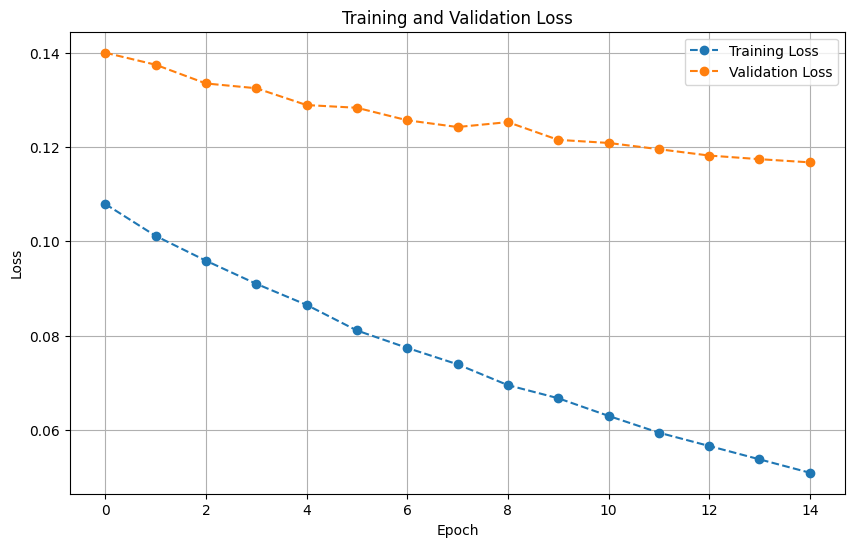

In [ ]:


# Plot training, validation, and testing loss with respect to epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', linestyle='--', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
# Evaluate the model on the test data and collect test loss
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9655 - loss: 0.1150
Test Loss: 0.10224848985671997
Test Accuracy: 0.9695000052452087


In [ ]:
import matplotlib.pyplot as plt

# Loop through each layer in the model
for layer_index, layer in enumerate(model.layers):
    # Get the weights of the layer
    weights = layer.get_weights()

    # Check if the layer has weights
    if weights:
        # Print the shape of the weights
        print(f'Layer {layer_index} ({layer.name}) weights shape: {weights[0].shape}')


    else:
        print(f'Layer {layer_index} ({layer.name}) has no weights.')


Layer 0 (flatten_37) has no weights.
Layer 1 (dense_103) weights shape: (784, 128)
Layer 2 (dense_104) weights shape: (128, 64)
Layer 3 (dense_105) weights shape: (64, 10)


In [ ]:
#Only input and output layer# Define the Sequential model
model = keras.Sequential([
    # Flatten the 28x28 input images to a 1D array (784 elements)
    layers.Flatten(input_shape=(28, 28)),



    # Add another dense layer with 10 units (one for each digit) and softmax activation
    layers.Dense(10, activation='softmax')
])

learning_rate=0.0005

optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
optimizer = keras.optimizers.SGD(learning_rate=learning_rate,momentum=0.5)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
# Train the model and collect training history

history = model.fit(train_images, train_labels, epochs=50, validation_split=0.2, verbose=2)

Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_38 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_106 (Dense)                    │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1500/1500 - 3s - 2ms/step - accuracy: 0.4974 - loss: 1.7824 - val_accuracy: 0.7320 - val_loss: 1.3552
Epoch 2/50
1500/1500 - 2s - 1ms/step - accuracy: 0.7589 - loss: 1.1805 - val_accuracy: 0.8133 - val_loss: 0.9938
Epoch 3/50
1500/1500 - 3s - 2ms/step - accuracy: 0.8065 - loss: 0.9362 - val_accuracy: 0.8403 - val_loss: 0.8218
Epoch 4/50
1500/1500 - 3s - 2ms/step - accuracy: 0.8260 - loss: 0.8072 - val_accuracy: 0.8520 - val_loss: 0.7220
Epoch 5/50
1500/1500 - 4s - 3ms/step - accuracy: 0.8383 - loss: 0.7271 - val_accuracy: 0.8590 - val_loss: 0.6566
Epoch 6/50
1500/1500 - 2s - 1ms/step - accuracy: 0.8461 - loss: 0.6719 - val_accuracy: 0.8648 - val_loss: 0.6101
Epoch 7/50
1500/1500 - 2s - 1ms/step - accuracy: 0.8522 - loss: 0.6312 - val_accuracy: 0.8689 - val_loss: 0.5752
Epoch 8/50
1500/1500 - 3s - 2ms/step - accuracy: 0.8571 - loss: 0.5998 - val_accuracy: 0.8728 - val_loss: 0.5482
Epoch 9/50
1500/1500 - 3s - 2ms/step - accuracy: 0.8603 - loss: 0.5747 - val_accuracy: 0.8766 - 

<ipython-input-7-85f13379b405>:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5, 5, i + 1)


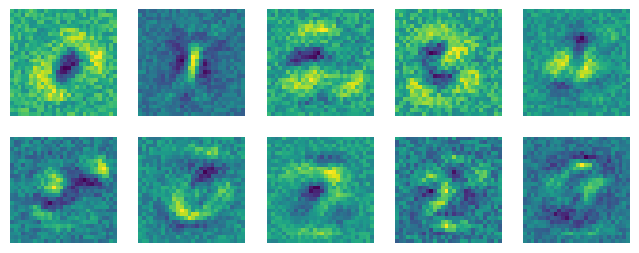

In [ ]:
import matplotlib.pyplot as plt

# Get the weights of a specific layer (e.g., the first dense layer)
layer_index = 1
weights = model.layers[layer_index].get_weights()[0]

# Reshape the weights to match the expected input shape (e.g., for a dense layer)
if len(weights.shape) == 2:
    weights = weights.reshape((28, 28, -1))

# Plot the weights as an image
plt.figure(figsize=(8, 8))
plt.title(f"Weights of Layer {layer_index}")
for i in range(weights.shape[-1]):
    plt.subplot(5, 5, i + 1)
    plt.imshow(weights[:, :, i], cmap='viridis')
    plt.axis('off')

plt.show()
